In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pdp

In [2]:
sns.set_theme(font_scale=1.5, style="ticks")


In [13]:
def load_and_process(path):
    
    import pandas as pd
    load = (
    pd.read_csv(path,header = None)
    .rename(columns={0:"instant",1:"dateday",2:"season",3:"year",4:"month",5:"hour",6:"holiday",7:"weekday",
                     8:"workingday",9:"weathersit",10:"temp",11:"atemp",12:"hum",13:"windspeed",
                     14:"casual",15:"registered",16:"cnt"})
    .dropna()
    .drop_duplicates()
    .rename(index = lambda x: x + 1) 
    )

    return load

df = load_and_process('../../data/raw/hour.csv')
df

instant     dateday  season year month hour  holiday  weekday  \
1      instant      dteday  season   yr  mnth   hr  holiday  weekday   
2            1  2011-01-01       1    0     1    0        0        6   
3            2  2011-01-01       1    0     1    1        0        6   
4            3  2011-01-01       1    0     1    2        0        6   
5            4  2011-01-01       1    0     1    3        0        6   
...        ...         ...     ...  ...   ...  ...      ...      ...   
17376    17375  2012-12-31       1    1    12   19        0        1   
17377    17376  2012-12-31       1    1    12   20        0        1   
17378    17377  2012-12-31       1    1    12   21        0        1   
17379    17378  2012-12-31       1    1    12   22        0        1   
17380    17379  2012-12-31       1    1    12   23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
1      workingday  weathersit  temp   atemp   hum  windspeed  casual   
2               0           1  0.24  0.2879  0.81          0       3   
3               0           1  0.22  0.2727   0.8          0       8   
4               0           1  0.22  0.2727   0.8          0       5   
5               0           1  0.24  0.2879  0.75          0       3   
...           ...         ...   ...     ...   ...        ...     ...   
17376           1           2  0.26  0.2576   0.6     0.1642      11   
17377           1           2  0.26  0.2576   0.6     0.1642       8   
17378           1           1  0.26  0.2576   0.6     0.1642       7   
17379           1           1  0.26  0.2727  0.56     0.1343      13   
17380           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
1      registered  cnt  
2              13   16  
3              32   40  
4              27   32  
5              10   13  
...           ...  ...  
17376         108  119  
17377          81   89  
17378          83   90  
17379          48   61  
17380          37   49  

[17380 rows x 17 columns]

In [14]:
df.shape

(17380, 17)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17380 entries, 1 to 17380
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   instant     17380 non-null  object
 1   dateday     17380 non-null  object
 2   season      17380 non-null  object
 3   year        17380 non-null  object
 4   month       17380 non-null  object
 5   hour        17380 non-null  object
 6   holiday     17380 non-null  object
 7   weekday     17380 non-null  object
 8   workingday  17380 non-null  object
 9   weathersit  17380 non-null  object
 10  temp        17380 non-null  object
 11  atemp       17380 non-null  object
 12  hum         17380 non-null  object
 13  windspeed   17380 non-null  object
 14  casual      17380 non-null  object
 15  registered  17380 non-null  object
 16  cnt         17380 non-null  object
dtypes: object(17)
memory usage: 2.4+ MB


In [16]:
df.head()

instant     dateday  season year month hour  holiday  weekday  workingday  \
1  instant      dteday  season   yr  mnth   hr  holiday  weekday  workingday   
2        1  2011-01-01       1    0     1    0        0        6           0   
3        2  2011-01-01       1    0     1    1        0        6           0   
4        3  2011-01-01       1    0     1    2        0        6           0   
5        4  2011-01-01       1    0     1    3        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
1  weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
2           1  0.24  0.2879  0.81          0       3          13   16  
3           1  0.22  0.2727   0.8          0       8          32   40  
4           1  0.22  0.2727   0.8          0       5          27   32  
5           1  0.24  0.2879  0.75          0       3          10   13

In [17]:
df.describe().T


count unique         top   freq
instant     17380  17380       15412      1
dateday     17380    732  2011-06-12     24
season      17380      5           3   4496
year        17380      3           1   8734
month       17380     13           5   1488
hour        17380     25          17    730
holiday     17380      3           0  16879
weekday     17380      8           6   2512
workingday  17380      3           1  11865
weathersit  17380      5           1  11413
temp        17380     51        0.62    726
atemp       17380     66      0.6212    988
hum         17380     90        0.88    657
windspeed   17380     31           0   2180
casual      17380    323           0   1581
registered  17380    777           4    307
cnt         17380    870           5    260

In [18]:
profile_report = pdp.ProfileReport(df)
profile_report

In [19]:
#sns.pairplot(df, vars=df.columns[:-1], hue='hum')

In [20]:
#sns.heatmap(df.corr())

In [25]:
#temprange= [0.02, 0.26, 0.51, 0.75, 1]
#cat=[0.02-0.26, 0.26-0.51, 0.51-0.75, 0.75-1]
#df['temp category']= pd.cut(df.temp, temprange, labels=cat, ordered=True)
#df.head()

In [27]:
humcasual=df.groupby(['hum'], as_index=False)['casual'].sum()
humcasual
                                    

hum                                             casual
0      0                             3001011106410312259141
1   0.08                                                 16
2    0.1                                                 19
3   0.12                                                  6
4   0.13                                                  3
..   ...                                                ...
85  0.94  1112271411022120017311217014780111621496941200...
86  0.96                                                161
87  0.97                                                 18
88     1  1200033110105118143710110220151101441812332003...
89   hum                                             casual

[90 rows x 2 columns]

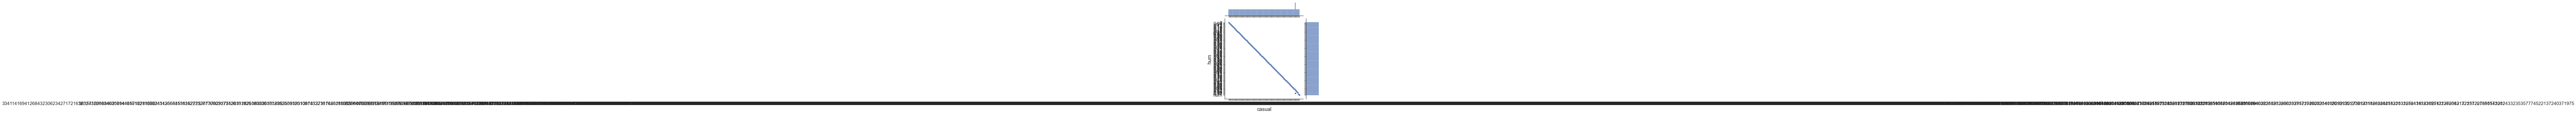

In [29]:
sns.jointplot(data=humcasual, y='hum', x='casual')

<AxesSubplot:xlabel='hum', ylabel='temp'>

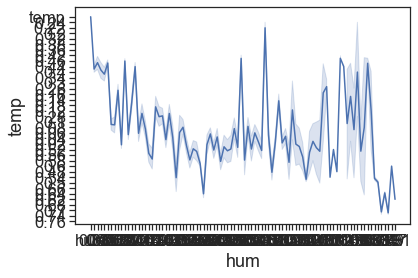

In [30]:
sns.lineplot(data=df, x='hum', y='temp')

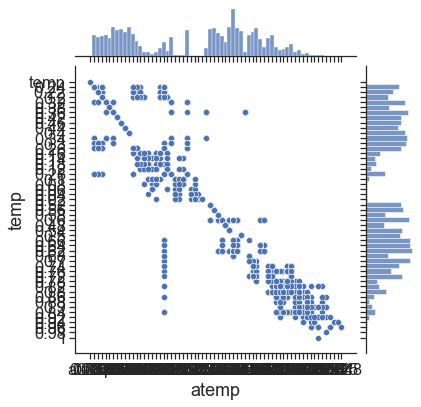

In [31]:
sns.jointplot(data=df, x='atemp', y='temp')

In [34]:
datedaycnt= df.groupby(['dateday'], as_index=False)['cnt'].sum()
datedaycnt

dateday                                                cnt
0    2011-01-01      164032131123814365684941061109367353736342839
1    2011-01-02             17179632182053709375597476655330223198
2    2011-01-03       52133064154884451616177727615715711052522012
3    2011-01-04     5212436941791004257789763658321218211254483511
4    2011-01-05     6622333881951155746797162628919016913289434219
..          ...                                                ...
727  2012-12-28  2595241551112239191162178222222261225250271213...
728  2012-12-29   263719633718444941454884981291471181109766605432
729  2012-12-30  4128191572813337412213614416916013813312312510...
730  2012-12-31  3419111394085196157120157224203247315214164122...
731      dteday                                                cnt

[732 rows x 2 columns]

In [36]:
datedaycnt= df.groupby(['weekday'], as_index=False)['cnt'].sum()
days ={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
datedaycnt['day'] = datedaycnt['weekday'].map(days)
datedaycnt

weekday                                                cnt  day
0        0  1717963218205370937559747665533022319825121141...  NaN
1        1  5213306415488445161617772761571571105252201251...  NaN
2        2  5212436941791004257789763658321218211254483511...  NaN
3        3  6622333881951155746797162628919016913289434219...  NaN
4        4  1142143695219122455984677062861721631126948522...  NaN
5        5  1771153484210134636759735072871871239551393615...  NaN
6        6  1640321311238143656849410611093673537363428392...  NaN
7  weekday                                                cnt  NaN